In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:

# Set random seed for reproducibility
np.random.seed(42)

# Simulate 300 patients
n = 300

# Generate realistic values
Age = np.random.randint(21, 65, size=n)
BMI = np.round(np.random.normal(30, 5, size=n), 2)
BloodPressure = np.random.randint(60, 100, size=n)
Glucose = np.random.randint(70, 180, size=n)
Insulin = np.random.randint(15, 276, size=n)

# Target variable: Outcome (1 = diabetic, 0 = not)
Outcome = ((Glucose > 125) & (BMI > 30)).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'Age': Age,
    'BMI': BMI,
    'BloodPressure': BloodPressure,
    'Glucose': Glucose,
    'Insulin': Insulin,
    'Outcome': Outcome
})
df.head()

,Age,BMI,BloodPressure,Glucose,Insulin,Outcome
0,59,41.37,85,118,229,0
1,49,30.73,81,140,96,1
2,35,32.70,89,70,237,0
3,63,22.51,76,165,117,0
4,28,29.94,85,82,28,0


In [75]:
X = df.drop('Outcome' , axis = 1)
Y = df['Outcome']
X_train , X_test, Y_train , Y_test = train_test_split(
    X,Y , test_size = 0.2 , random_state = 42
) 
X_test.shape
X_train.shape

(240, 5)

In [77]:

scaler = StandardScaler()
X_trained_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model = LogisticRegression()
model.fit ( X_trained_scale , Y_train)

y_predicted = model.predict(X_test_scale)
y_prob = model.predict_proba(X_test_scale)[:, 1] 

print("Accuracy:", accuracy_score(Y_test, y_predicted))
print("Precision:", precision_score(Y_test, y_predicted))
print("Recall:", recall_score(Y_test, y_predicted))
print("F1 Score:", f1_score(Y_test, y_predicted))
print("ROC AUC Score:", roc_auc_score(Y_test, y_prob))

Accuracy: 0.9333333333333333
Precision: 0.875
Recall: 0.7
F1 Score: 0.7777777777777778
ROC AUC Score: 0.9460000000000001


Confusion Matrix:
 [[49  1]
 [ 3  7]]


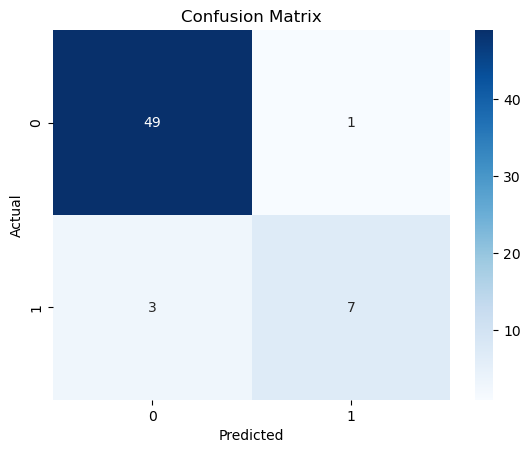


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.88      0.70      0.78        10

    accuracy                           0.93        60
   macro avg       0.91      0.84      0.87        60
weighted avg       0.93      0.93      0.93        60



In [79]:

cm = confusion_matrix(Y_test, y_predicted)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(Y_test, y_predicted))